# 作业四

## 题一利用幂余法产生自己的随机序列，参数自己选择，并将产生的随机数填入直方图

In [14]:
import numpy as np
import matplotlib.pyplot as plt
a=3
b=7
c=111
def random_linear(X0,n):
    X=[X0]
    for i in range(1,n):
        X.append((a*X[i-1]+b)%c)
    print(X)

In [16]:
random_linear(1,90)

[1, 10, 37, 7, 28, 91, 58, 70, 106, 103, 94, 67, 97, 76, 13, 46, 34, 109, 1, 10, 37, 7, 28, 91, 58, 70, 106, 103, 94, 67, 97, 76, 13, 46, 34, 109, 1, 10, 37, 7, 28, 91, 58, 70, 106, 103, 94, 67, 97, 76, 13, 46, 34, 109, 1, 10, 37, 7, 28, 91, 58, 70, 106, 103, 94, 67, 97, 76, 13, 46, 34, 109, 1, 10, 37, 7, 28, 91, 58, 70, 106, 103, 94, 67, 97, 76, 13, 46, 34, 109]


用线性同余法产生随机数的特点是非常容易实现，生成速度快，但是弊端也很明显，32位的数周期最长只能到2^32，达不到需要高质量随机数的应用如加密应用的要求,而且会出现循环结构。如上：以1, 10, 37, 7, 28, 91, 58, 70, 106, 103, 94, 67, 97, 76, 13, 46, 34, 109为一个循环周期。

In [17]:
random_linear(2,90)

[2, 13, 46, 34, 109, 1, 10, 37, 7, 28, 91, 58, 70, 106, 103, 94, 67, 97, 76, 13, 46, 34, 109, 1, 10, 37, 7, 28, 91, 58, 70, 106, 103, 94, 67, 97, 76, 13, 46, 34, 109, 1, 10, 37, 7, 28, 91, 58, 70, 106, 103, 94, 67, 97, 76, 13, 46, 34, 109, 1, 10, 37, 7, 28, 91, 58, 70, 106, 103, 94, 67, 97, 76, 13, 46, 34, 109, 1, 10, 37, 7, 28, 91, 58, 70, 106, 103, 94, 67, 97]


 尝试得到最大循环周期

In [41]:
def random_linear(X0,n):
    a=3
    b=7
    c=1111
    X=[X0]
    for i in range(1,n):
        X.append((a*X[i-1]+b)%c)
    print(X)
    plt.hist(X)

改进版：

In [53]:
def random_linear():
    global x0
    x0 = x0 * a + c   #线性同余法规则
    return int(x0 % m)

if __name__=='__main__':
    a = int(input("请输入a(0=<a<m):"))
    c = int(input("请输入c(0=<c<m):"))
    m = int(input("请输入m(m>0):"))
    x0 = int(input("请输入x0(0=<x0<m):"))
    r= []
    for i in range(0,50): #生成计算50次范围内
        r.append(random_linear())
        if r[0] == r[i]  and i!=0:
            print("周期:",i)
            break          
        print(r[i])


请输入a(0=<a<m):3
请输入c(0=<c<m):5
请输入m(m>0):111
请输入x0(0=<x0<m):1
8
29
92
59
71
107
104
95
68
98
77
14
47
35
110
2
11
38
周期: 18


[1, 10, 37, 118, 361, 1090, 1055, 950, 635, 801, 188, 571, 609, 723, 1065, 980, 725, 1071, 998, 779, 122, 373, 15, 52, 163, 496, 384, 48, 151, 460, 276, 835, 290, 877, 416, 144, 439, 213, 646, 834, 287, 868, 389, 63, 196, 595, 681, 939, 602, 702, 1002, 791, 158, 481, 339, 1024, 857, 356, 1075, 1010, 815, 230, 697, 987, 746, 23, 76, 235, 712, 1032, 881, 428, 180, 547, 537, 507, 417, 147, 448, 240, 727, 1077, 1016, 833, 284, 859, 362, 1093, 1064, 977, 716, 1044, 917, 536, 504, 408, 120, 367, 1108, 1109, 1, 10, 37, 118, 361, 1090, 1055, 950, 635, 801, 188, 571, 609, 723, 1065, 980, 725, 1071, 998, 779, 122, 373, 15, 52, 163, 496, 384, 48, 151, 460, 276, 835, 290, 877, 416, 144, 439, 213, 646, 834, 287, 868, 389, 63, 196, 595, 681, 939, 602, 702, 1002, 791, 158, 481, 339, 1024, 857, 356, 1075, 1010, 815, 230, 697, 987, 746, 23, 76, 235, 712, 1032, 881, 428, 180, 547, 537, 507, 417, 147, 448, 240, 727, 1077, 1016, 833, 284, 859, 362, 1093, 1064, 977, 716, 1044, 917, 536, 504, 408, 120, 367,

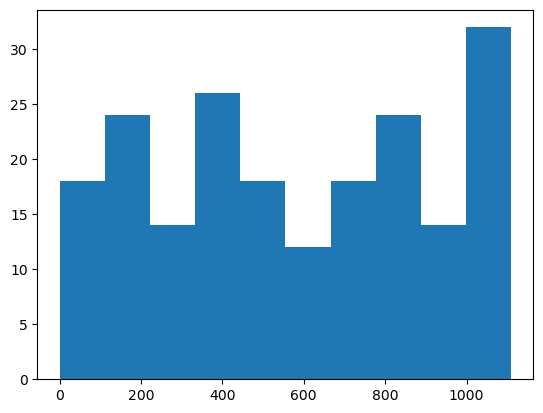

In [42]:
random_linear(1,200)

易知c越大，循环周期越大，但由算法原理可知：T<=c。因为取c共有c个不同的整数结果，第c+1个数一定和前面某一个数相同，而由于一一对应的递推关系，后面的序列也会依次与前面的数相同。
证明略：
a，c互质；c的所有质因数都能整除a-1；若c是4的倍数，a-1也是；a，b，n都比c小

## 修改Walk.py程序，使用自己编写的随机数产生器，并绘制R和\sqrt{N}之间的关系（和使用random.random()的结果进行比较）。注意：计算R的次数较多，计算时把绘图的部分关闭

In [77]:
# Walk.py, A 2D Random Walk, Notebook Verssion

from __future__ import division,print_function
from vpython import *
from IPython.display import IFrame
import random
from numpy import *
import matplotlib.pyplot as plt

scene=canvas(title="Walk 2D")
scene.width=500
scene.height=500
scene.range=35
walk=curve(color=color.yellow,radius=0.1)
jmax=10000
x=0
y=0
#walk.pos=(0,0)
s1=0
sx=0
sy=0
for i in range(0,jmax):
    x += 2.0*random.random()-1
    y += 2*random.random()-1
    walk.append(pos=(x,y,0))
    s1=x*x+y*y+s1
    sx=x+sx
    sy=y+sy
N=sqrt(s1)
Rrms=sqrt(sx*sx+sy*sy)
print(N,Rrms)

xaxs=curve(pos=[vector(0,0,0),vector(0,30,0)],radius=0.2)
yaxs=curve(pos=[vector(0,0,0),vector(30,0,0)],radius=0.2)
xlb=label(x=45,y=3,text ="x",height=20) 
ylb=label(x=10,y=30,text ="y",height=20)  
R=sqrt(x*x+y*y)
rlb=label(pos=vector(-30,25,0),height=20)
message="Distance from origin "
message +="%.2f"%R
rlb.text=message

<IPython.core.display.Javascript object>

3620.947352971065 305033.6314064428


In [78]:
# Walk.py, A 2D Random Walk, Notebook Verssion

from __future__ import division,print_function
from vpython import *
from IPython.display import IFrame
from numpy import *
import random

scene=canvas(title="Walk 2D")
scene.width=500
scene.height=500
scene.range=35
walk=curve(color=color.yellow,radius=0.1)
jmax=10000
x=0
y=0
#walk.pos=(0,0)
#for i in range(0,jmax):
#    x += 2.0*random_linear()-1
#    y += 2*random_linear()-1
   # walk.append(pos=(x,y,0))

a=3
b=7
c=1111
X0=1
X=[X0]
for i in range(1,jmax):
    X.append((a*X[i-1]+b)%c)
    x += 2.0*(X[i-1]/100000)-1
    y += 2*(X[i-1]/100000)-1
    walk.append(pos=(x,y,0))
    
xaxs=curve(pos=[vector(0,0,0),vector(0,30,0)],radius=0.2)

yaxs=curve(pos=[vector(0,0,0),vector(30,0,0)],radius=0.2)
xlb=label(x=45,y=3,text ="x",height=20) 
ylb=label(x=10,y=30,text ="y",height=20)  
R=sqrt(x*x+y*y)
rlb=label(pos=vector(-30,25,0),height=20)
message="Distance from origin "
message +="%.2f"%R
rlb.text=message

<IPython.core.display.Javascript object>

In [79]:
print(R)

13978.338835067938


## 题三自回避随机行走程序

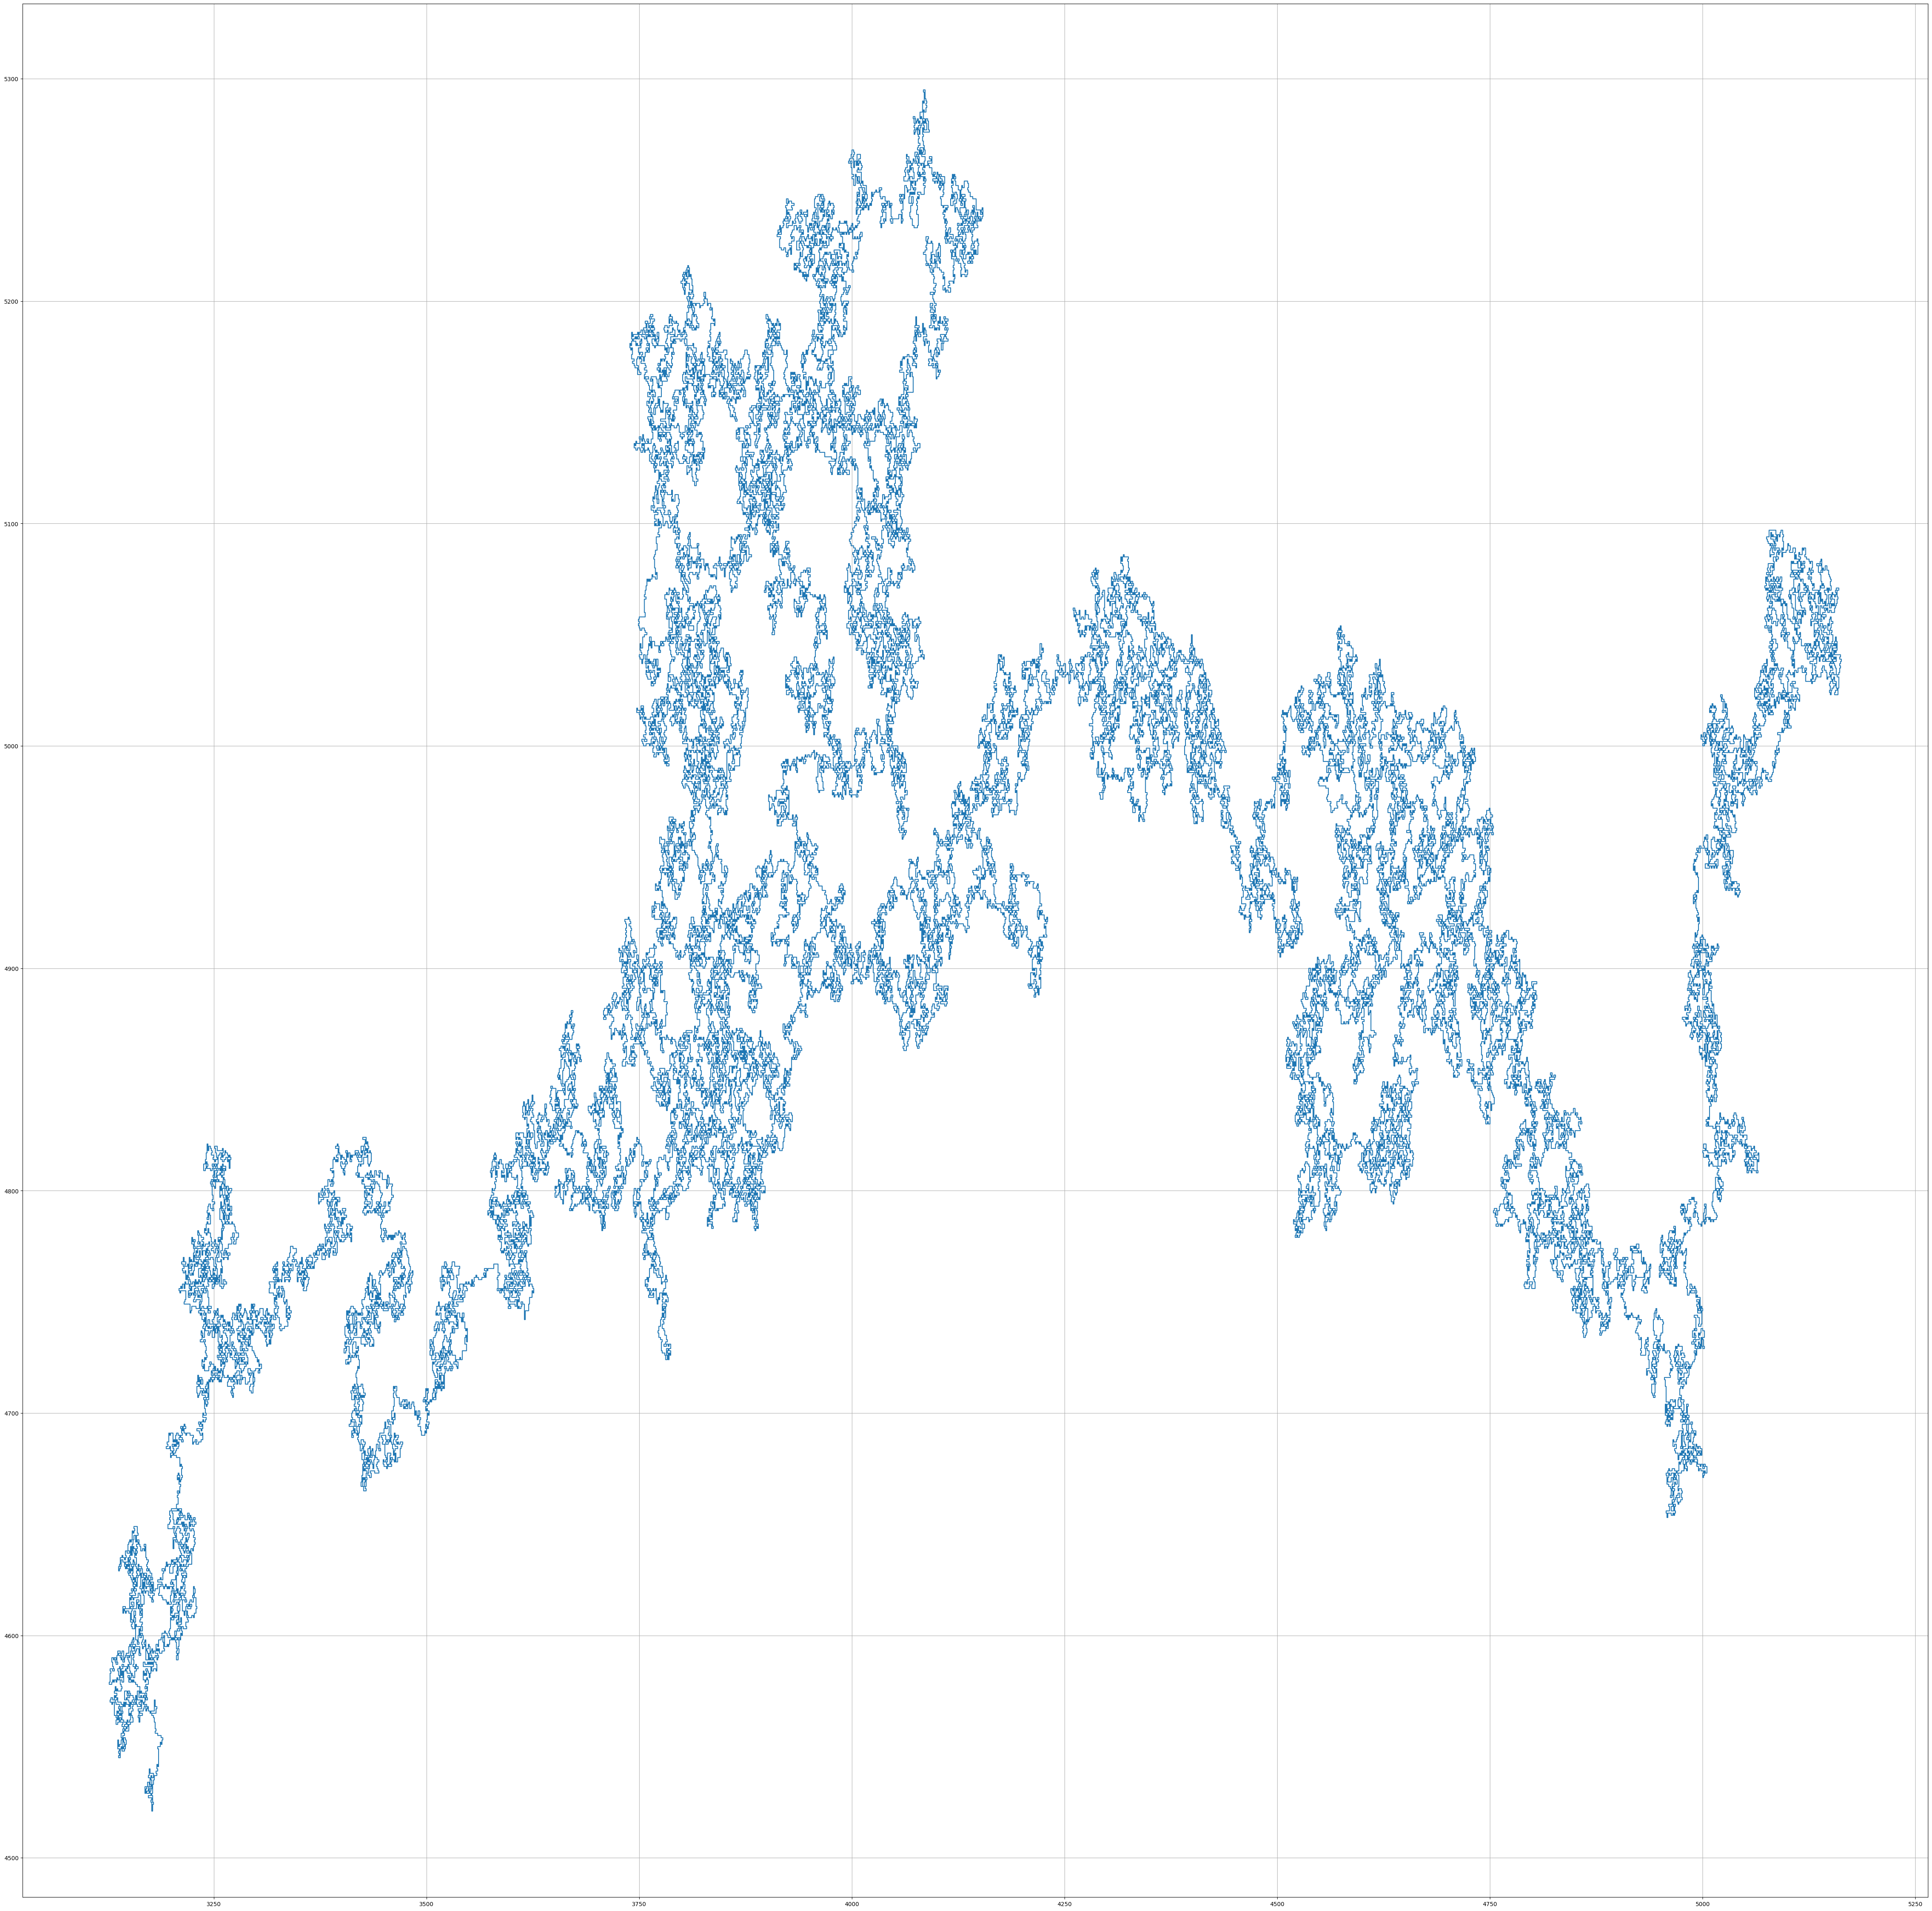

In [83]:
import matplotlib.pyplot as plt 
import numpy as np
import random
%matplotlib inline
def roll(circle,k,nucx,nucy):         #判断闭合是否包围原点
    judge=[0,0]
    for i in range(circle,k-1):
        flag=0
        if (nucx[i-1]==s+1 and nucx[i]>s+1 and nucy[i]>s+1) or (nucy[i-1]==s+1 and nucy[i]>s+1 and nucx[i]>s+1):
            judge.append(1)
            flag=1
        elif (nucx[i-1]==s+1 and nucx[i]<s+1 and nucy[i]>s+1) or (nucy[i-1]==s+1 and nucy[i]>s+1 and nucx[i]<s+1):
            judge.append(2)
            flag=1
        elif (nucx[i-1]==s+1 and nucx[i]<s+1 and nucy[i]<s+1) or (nucy[i-1]==s+1 and nucy[i]<s+1 and nucx[i]<s+1):
            judge.append(3)
            flag=1
        elif (nucx[i-1]==s+1 and nucx[i]>s+1 and nucy[i]<s+1) or (nucy[i-1]==s+1 and nucy[i]<s+1 and nucx[i]>s+1):
            judge.append(4)
            flag=1
        if flag==1:
            if judge[-1]==judge[-3]:
                judge.pop(-1)
                judge.pop(-2)
            elif judge[-1]==judge[-2]:
                judge.pop(-1)
    if len(judge)==6:
        return 0
    else:
        return 1
    
    
    
s=5000           #边界
target=100000    #目标步数
restart=True     #是否重新循环
while restart:
    restart=False
    order=np.zeros((2*s+3,2*s+3),dtype=int)       #顺序矩阵
    direc=[]                            #方向矩阵
    for i in np.arange(2*s+3):          #设定边界为-1
        order[0][i]=-1
        order[-1][i]=-1
        order[i][0]=-1
        order[i][-1]=-1
    ev=[(1,0),(0,1),(-1,0),(0,-1)]       
    nucx=[s+1]                           #路径位置记录
    nucy=[s+1]
    new=(s+1,s+1)                        #暂时位置
    order[s+1][s+1]=1                    #设定起点
    for k in np.arange(target):
        wall=0                         
        avi=[0,1,2,3]                    #可行方向集合
        ju=0                             #判断wall
        if k!=0:                         #第一步完全随机
            avi.remove((direc[-1]+2)%4)
            for i in np.arange(3):
                ju=order[new[0]+ev[(direc[-1]-1+i)%4][0]][new[1]+ev[(direc[-1]-1+i)%4][1]]
                if ju!=0:
                    wall+=1
                    avi.remove((direc[-1]-1+i)%4)
 
            if wall==3:
                #print(k)
                #print(new)
                restart=True            #重新循环
                break
            if wall==1:
                if order[new[0]+ev[direc[-1]][0]][new[1]+ev[direc[-1]][1]]>1:        #前方被堵
                    circle=int(order[new[0]+ev[direc[-1]][0]][new[1]+ev[direc[-1]][1]])
                    may1=direc[circle-2]
                    may2=direc[circle-1]
                    if roll(circle,k,nucx,nucy):
                        if avi[0]==may1 or avi[1]==may1:
                            may3=may1
                        else:
                            may3=may2
                        avi.remove(may3)
                    else:
                        if avi[0]==may1 or avi[1]==may1:
                            may3=(may1+2)%4
                        else:
                            may3=(may2+2)%4
                        avi.remove(may3)
                elif order[new[0]+ev[(direc[-1]+1)%4][0]][new[1]+ev[(direc[-1]+1)%4][1]]>1:  #左侧被堵
                    circle=int(order[new[0]+ev[(direc[-1]-1)%4][0]+ev[direc[-1]][0]][new[1]+ev[(direc[-1]-1)%4][1]+ev[direc[-1]][1]])
                    if circle>1:
                        if roll(circle,k,nucx,nucy):
                            avi.remove(direc[circle-1])
                        else:
                            avi.remove((direc[circle-2]+2)%4)
                elif order[new[0]+ev[(direc[-1]-1)%4][0]][new[1]+ev[(direc[-1]-1)%4][1]]>1:   #右侧被堵
                    circle=int(order[new[0]+ev[(direc[-1]+1)%4][0]+ev[direc[-1]][0]][new[1]+ev[(direc[-1]+1)%4][1]+ev[direc[-1]][1]])
                    if circle>1:
                        if roll(circle,k,nucx,nucy):
                            avi.remove(direc[circle-1])
                        else:
                            avi.remove((direc[circle-2]+2)%4)
            elif wall==0:
                if order[new[0]+ev[(direc[-1]+1)%4][0]+ev[direc[-1]][0]][new[1]+ev[(direc[-1]+1)%4][1]+ev[direc[-1]][1]]>1:
                    circle=int(order[new[0]+ev[(direc[-1]+1)%4][0]+ev[direc[-1]][0]][new[1]+ev[(direc[-1]+1)%4][1]+ev[direc[-1]][1]])
                    if roll(circle,k,nucx,nucy):
                        if direc[circle-1] in avi:
                            avi.remove(direc[circle-1])
                        if direc[circle-2] in avi:
                            avi.remove(direc[circle-2])
                    else:
                        if (direc[circle-1]+2)%4 in avi:
                            avi.remove((direc[circle-1]+2)%4)
                        if (direc[circle-2]+2)%4 in avi:
                            avi.remove((direc[circle-2]+2)%4)
                if order[new[0]+ev[(direc[-1]-1)%4][0]+ev[direc[-1]][0]][new[1]+ev[(direc[-1]-1)%4][1]+ev[direc[-1]][1]]>1:
                    circle=int(order[new[0]+ev[(direc[-1]-1)%4][0]+ev[direc[-1]][0]][new[1]+ev[(direc[-1]-1)%4][1]+ev[direc[-1]][1]])
                    if roll(circle,k,nucx,nucy):
                        if direc[circle-1] in avi:
                            avi.remove(direc[circle-1])
                        if direc[circle-2] in avi:
                            avi.remove(direc[circle-2])
                    else:
                        if (direc[circle-1]+2)%4 in avi:
                            avi.remove((direc[circle-1]+2)%4)
                        if (direc[circle-2]+2)%4 in avi:
                            avi.remove((direc[circle-2]+2)%4)
 
        ra=random.choice(avi)                          #抽取方向
        new=(new[0]+ev[ra][0],new[1]+ev[ra][1])        #更新暂时位置
        nucx.append(new[0])                            #更新路径位置
        nucy.append(new[1])
        order[new[0]][new[1]]=k+2                      #更新顺序矩阵
        direc.append(ra)                               #更新方向集合
 
plt.figure(figsize=(60,60))
plt.plot(nucx,nucy)
plt.grid(True)

蔡浩老师，请问能不能分享几个前面作业的优秀案例啊，有些东西看不太懂，想参照着再试着码一编，麻烦老师了。